## Classification


Let's use the MNIST dataset of handwritten digits as an example. It is an excellent dataset for those learning pattern recognition techniques in images, as described by the author himself:<br>
http://yann.lecun.com/exdb/mnist/

MNIST consists of **10 classes**, representing digits from 0 to 9, as shown in the following image.
![](https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png)

t is part of the datasets available through the library.<br>```torchvision```<br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.MNIST

Following the Torchvision standardization, we can load the dataset with a simple function call. Each MNIST element is represented in the form of ```(data, label)```.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets, transforms

In [ ]:
MNIST = datasets.MNIST('./',
                      train=False,
                      download=True,
                      transform=transforms.ToTensor())


data, label = MNIST[0]
print(type(data), type(label))

# Channel First: Padrão do torch
print(data.size()) # C x H x W

100%|██████████| 9912422/9912422 [00:00<00:00, 55725092.34it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 22076853.26it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21189820.99it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13966663.32it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28])


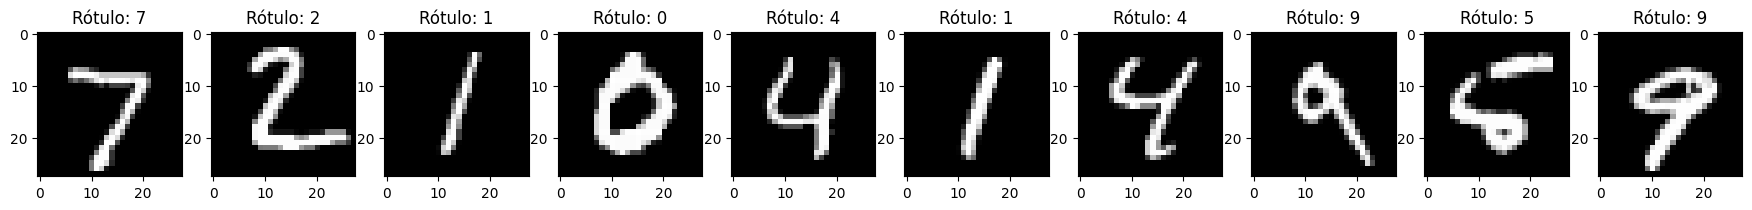

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(22, 4))
for i in range(10):
  data, label = MNIST[i]
  axs[i].imshow(data[0], cmap='gray')
  axs[i].set_title('Rótulo: ' + str(label))
plt.show()

> **Como deve ser a última camada de uma rede cujo objetivo é classificar os dados do MNIST?**
---



### Detection

To illustrate the detection problem, we will use the PascalVOC 2012 dataset:<br>
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/

The [PASCAL Visual Object Classes](http://host.robots.ox.ac.uk/pascal/VOC/) is a project that organizes competitions for developers interested in the challenges of pattern recognition in images. Among the challenges are: detection, segmentation, action recognition, among others. <br>

Detection data can be found in the Torchvision package:<br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.VOCDetection


In [ ]:
coco = datasets.VOCDetection('./',
                             image_set='train',
                             download=True,
                             transform=transforms.ToTensor())

data, label = coco[0]
print(type(data), type(label))

100%|██████████| 1999639040/1999639040 [02:35<00:00, 12832772.87it/s]


Extracting ./VOCtrainval_11-May-2012.tar to ./
<class 'torch.Tensor'> <class 'dict'>


Images in color have **color channels** (RGB: *red, green, blue*). <br>
By default, PyTorch adopts the *channel first* format, meaning **channel first**, referring to the image's dimensionality: **$C \times H \times W$**<br>

On the other hand, visualization libraries like matplotlib represent images with the channel in the last dimension. Therefore, before plotting the image, we need to organize the dimensions.


dimension: torch.Size([3, 442, 500])


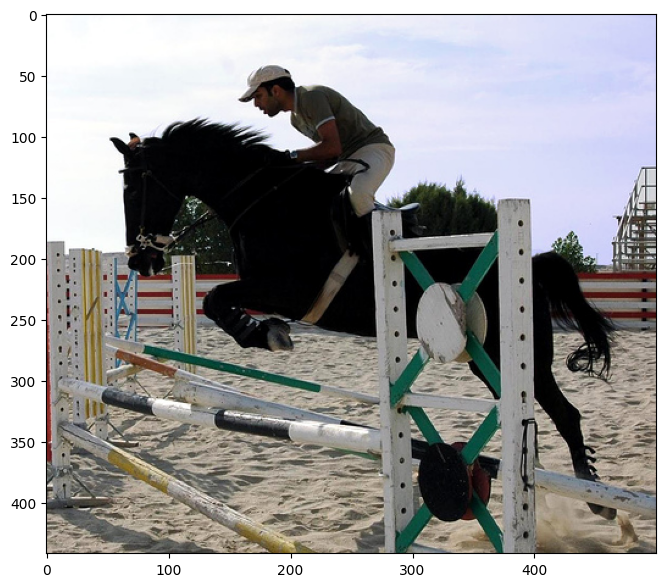

In [ ]:
print('dimension:', data.size())
data, label = coco[0]
data = data.permute(1, 2, 0)

plt.figure(figsize=(8, 7) )
plt.imshow(data)
plt.show()

In [ ]:
label

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

We are interested in the **bounding box** of the label, which in a loose translation would be the "bounding box", a rectangle that defines the location of the object in the image. According to the PascalVOC annotation standard, an object's label can be accessed as follows:
```python
xmax, xmin, ymax, ymin = rotulo['annotation']['object'][0]['bndbox'].values()
```

o visualize the bounding box, we will use matplotlib's ```patches```
```
rect = patches.Rectangle((xmin, ymin),w,h)
```

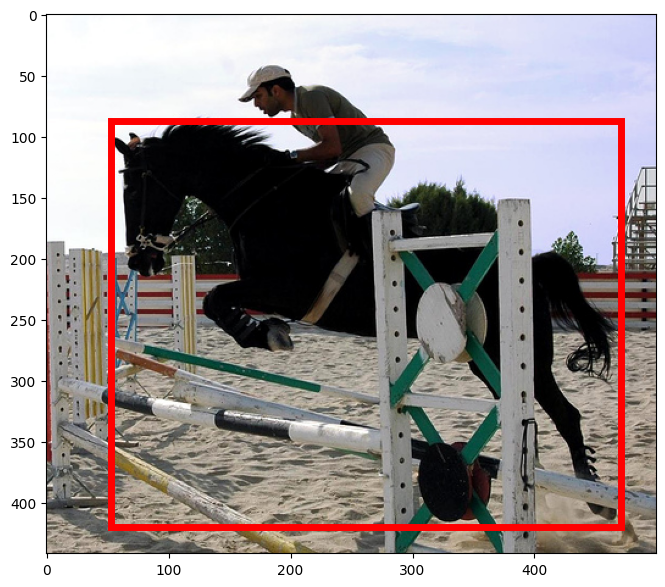

In [ ]:
bbox = label['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 7))
plt.imshow(data)

rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
ax.add_patch(rect)

plt.show()

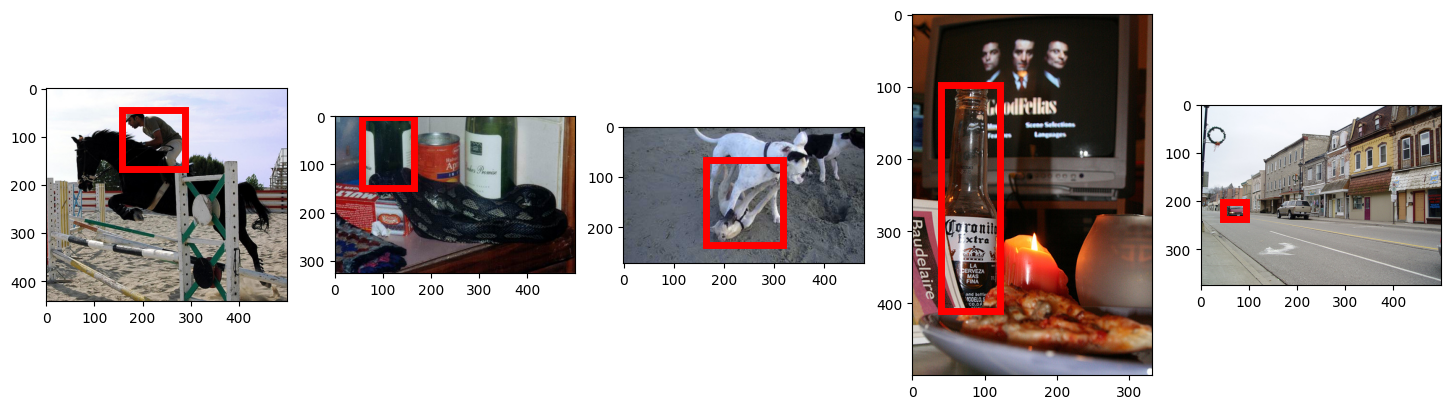

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(18, 7))
for i in range(5):
  data, label = coco[i]
  data = data.permute(1, 2, 0)

  bbox = label['annotation']['object'][1]['bndbox']
  xmax = int(bbox['xmax'])
  xmin = int(bbox['xmin'])
  ymax = int(bbox['ymax'])
  ymin = int(bbox['ymin'])

  axs[i].imshow(data)

  rect = patches.Rectangle((xmin, ymin), xmax-xmin , ymax-ymin, fill=False, linewidth=5, edgecolor='r')
  axs[i].add_patch(rect)

> **Como deve ser a última camada de uma rede cujo objetivo é detectar os objetos do PascalVOC?** <br>
---

## Segmentation


PascalVOC also provides segmentation labels for some of its images, so we will continue using this dataset. <br>
https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.VOCSegmentation

The segmentation task involves **dense labeling**, predicting the exact location of objects in the scene at the pixel level. The following image shows both detection and segmentation labels to clarify the difference.

![](https://www.researchgate.net/profile/Yizhou_Yu/publication/323410937/figure/fig5/AS:644201683361796@1530601058684/The-detection-and-semantic-segmentation-results-on-Pascal-VOC-2012-test-set-the-first_W640.jpg)

Segmentation labels are generally also images, representing the mask over the object to be segmented.

In [ ]:
coco = datasets.VOCSegmentation('./',
                             image_set='train',
                             download=False,
                             transform=transforms.ToTensor(),
                             target_transform=transforms.ToTensor())

data, label = coco[0]
print(type(data), type(label))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [ ]:
print(data.size(), label.size())

torch.Size([3, 281, 500]) torch.Size([1, 281, 500])


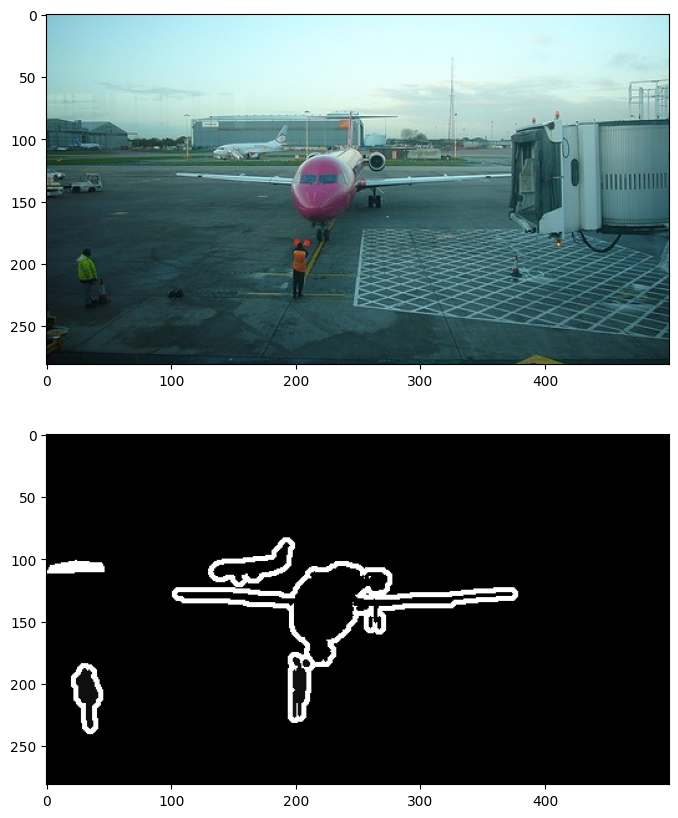

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(10, 10))

#data = data.permute(1, 2, 0)
axs[0].imshow(np.transpose(data, (1, 2, 0)))
axs[1].imshow(label[0], cmap='gray')

> In general, neural network-based segmentation approaches do not use fully connected layers; instead, they employ architectures that are **fully convolutional**. By the end of the course, we will have a better understanding of the benefits of this approach.

## Convolution 1D


Before delving into the domain of images, let's understand convolution in a simpler context by working with signals in just one dimension.

Remember: Convolution is the sum of the product between functions, with one of them being **inverted and shifted**. The term Convolution **1D** indicates that this function will be shifted in only one dimension.

---

Let's consider the following problem:<br>
You have decided to collect data from the accelerometer of a cellphone. The goal is to have people walk with the phone in their pocket to analyze how the sensor responds to this movement. As demonstrated in [this study](https://www.researchgate.net/publication/221296054_Impact_of_different_walking_surfaces_on_gait_identification_based_on_higher-order_statistics_of_accelerometer_data/figures?lo=1), the magnitude in the accelerometer signal changes like a kind of **noisy sine wave**.

Next, let's simulate similar data and assume that **we want to identify the increasing intervals in this signal.**


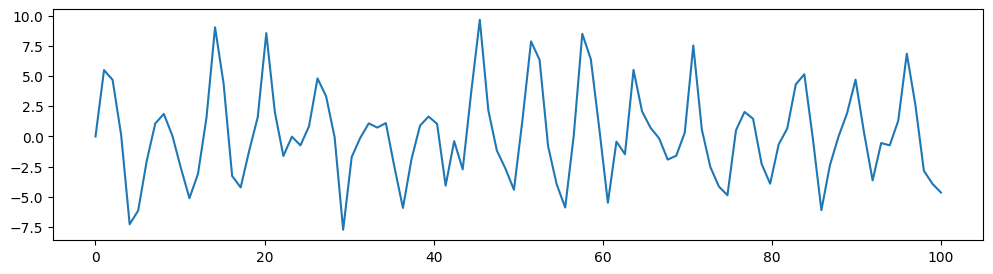

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

x = np.linspace(0, 100, 100)
sin = 10 * np.sin(x) * np.random.rand(x.shape[0])

plt.figure(figsize=(12, 3))
plt.plot(x, sin)


Facilitating Visualization
To make it easier, the following cell presents a function that uses matplotlib to display 1D signals as a vector of values.


In [ ]:
def show(valores, title,):
  plt.figure(figsize=(len(valores), 2))
  plt.imshow(valores[np.newaxis, :], cmap='gray')
  for k, s in enumerate(valores):
    plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
  plt.title(title, fontsize=18)
  plt.yticks([])

### 1D Representation

We will use a small segment of the signal to illustrate the effect of convolution.


In [ ]:
sinal = sin[5:15]
show(sinal, 'Sinal')

plt.figure(figsize=(10, 4))
plt.plot(sinal)

### Kernel

In the context of image processing, the kernel is a **convolutional filter**. In practical terms, it is an n-dimensional matrix that is applied to the data through convolution.

One can say that convolution **measures similarity** between the two signals.

Therefore, we need to propose a kernel that simulates the desired pattern: increasing intervals.
> But remember that convolution operates on functions after **inverting the kernel**.


In [ ]:
kernel = np.asarray([1,0,-1])
show(kernel, 'Kernel')

plt.figure(figsize=(10, 4))
plt.plot(kernel)

In [ ]:
kernel_invertido = np.flip(kernel)
show(kernel_invertido, 'Kernel Invertido')

plt.figure(figsize=(10, 4))
plt.plot(kernel)

In the next cell, we will print the kernel **shifting it along the signal** to understand the step-by-step operation.


In [ ]:
plt.close('all')

## Vamos alterar o valor de u
## para deslocar o kernel
u=2
deslocamento = [float('nan')] * u
kernel_deslocado = np.hstack( (deslocamento, kernel_invertido) )

show(kernel_deslocado, 'Kernel Inv. Desl.')
show(sinal, 'Sinal')

Now let's compare our calculations with the result of the `convolve` function from the `scipy` library.


In [ ]:
out = convolve(sinal, kernel, mode='valid')
show(out, 'Saída')

To make it more visual, let's print the resulting function overlaid on the original signal to better understand how this function helps us identify the increasing intervals in the original signal.


In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(sinal, color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))
plt.colorbar()

And what if we run it on the rest of the signal as a kind of classification?<br>
In this specific context, we can consider that **activations less than zero** indicate that there is no increasing trend in that interval of the signal.


In [ ]:
out = convolve(sin[:50], kernel, mode='valid')
out[out < 0] = 0

plt.figure(figsize=(15, 4))
plt.plot(sin[:50], color='k', linewidth=4)
plt.imshow(out[np.newaxis, :], cmap='Reds', aspect='auto', alpha=0.8, extent=(0.5, 48.5, -10, 10))
plt.xlim(-0.5, 50.5)
plt.colorbar()

## Convolution 2D



Now we can start working with images!! 2D convolution involves shifting a kernel along the data, this time being able to move in two dimensions. Similarly, the kernel can also have two dimensions.

In [ ]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

Let's assume that we want to **detect edges in images**. We will use as an example an image of a brick wall:
```python
img = data.brick()
```

In [ ]:
img = data.brick()
plt.imshow(img, cmap='Greys')

To help us from now on, let's define a method to print kernels as images.

In [ ]:
def show(valores, title):
  plt.figure(figsize=(len(valores), len(valores) ))
  plt.imshow(valores, cmap='gray')
  for i, line in enumerate(valores):
    for j, col in enumerate(line):
      plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
  plt.title(title)
  plt.xticks([])
  plt.yticks([])
  plt.savefig(title+'.png', format='png', dpi=100, bbox_inches='tight')

Let's now define two different kernels
* **Vertical** edge kernel
* **Horizontal** edge kernel


In [ ]:
kernel_v = [ [-1, 0, 1],
             [-1, 0, 1],
             [-1, 0, 1]]

show(kernel_v, 'Kernel Vertical')

kernel_h = [ [-1, -1, -1],
             [0, 0, 0],
             [1, 1, 1]]
show(kernel_h, 'Kernel Horizontal')

Now, let's convolve both kernels with the brick wall and observe the result. Each kernel will highlight different parts of the image!!

The result of the convolution between the data and the kernel is called a **Feature Map** or **Activation Map**.

In [ ]:
mapa_de_caracteristicas = convolve(img, kernel_v, mode='valid')
plt.imshow(img, cmap='Greys')

plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

mapa_de_caracteristicas = convolve(img, kernel_h, mode='valid')
plt.figure()
plt.imshow(mapa_de_caracteristicas, cmap='Greys')

### A Note on Activations

When we define the kernel, it seeks the pattern for which it was designed, but it's worth taking a closer look at its behavior. Let's print the original kernel and its flipped version, which is actually operated on the image during convolution.

In [ ]:
show(kernel_v, 'Kernel')
show(np.flip(kernel_v), 'Kernel Invertido')

Let's apply this kernel to an image that you might be familiar with. The logo of an online courses company in technology and digital marketing!

In [ ]:
!wget https://is5-ssl.mzstatic.com/image/thumb/Purple113/v4/a2/56/30/a2563080-dddc-6a02-9034-a461c6c02fae/AppIcon-0-1x_U007emarketing-0-0-85-220-0-10.png/1200x630wa.png

In [ ]:
# Read and process the image
img = io.imread('1200x630wa.png')

# Discard the alpha channel if it exists
if img.shape[2] == 4:
    img = img[:, :, :3]

img = color.rgb2gray(img)
img = transform.resize(img, (img.shape[0] // 10, img.shape[1] // 10))

# Define a vertical kernel (you need to provide the kernel_v)
# kernel_v = ...

# Convolve the image with the vertical kernel
saida = convolve(img, kernel_v, 'valid')

# Plot the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

# Plot the activation map
plt.figure(figsize=(8, 5))
plt.imshow(np.abs(saida), cmap='gray')
plt.colorbar()
plt.title('Activation Map')


Note that the absolute value of the kernel's activation is high when it finds a good match for its pattern, but also when it encounters the pattern opposite to what it carries. In the latter case, its activation has a negative sign.

# Convolutional Filters

* **Kernels** are convolutional filters. In practice, they are n-dimensional arrays that are operated on the data through convolution.
* The **kernel weights**, i.e., the elements of the array, carry the pattern that will be sought in the original data.

These filters can be manually designed if we already know the pattern we want to look for or the desired activation map. Next, we will explore some convolutional kernels and the intuition behind the pattern they project.


In [ ]:
import matplotlib.pyplot as plt
from skimage import io

from scipy.signal import convolve
import numpy as np

%matplotlib inline

In the following cell, we have again the function used for printing the results.


In [ ]:
def show(img, kernel, resultado, titulo):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  plot = [img, kernel, resultado]
  titulos = ['Imagem', titulo, 'Mapa de Ativação']
  for k, ax in enumerate(axs):
    ax.imshow(plot[k], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title(titulos[k])

  for i, line in enumerate(kernel):
    for j, col in enumerate(line):
      axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', ha='center', va='center')

As input data, we will use the image of one of the instructors from Alura, Guilherme Silveira.


In [ ]:
!wget https://s3.us-east-1.amazonaws.com/jarvis-caelum/GUI.jpg

In [ ]:
img = io.imread('GUI.jpg')
img = img[:,:,0]
plt.imshow(img, cmap='gray')

# Average Filter

When applying this filter to an image, the resulting activation map will be a smoothed version of the original image (more "blurred," less sharp). This effect is achieved by leveraging the convolution operation to average the pixels in subregions of the image.

The weights of this kernel are set to replicate the average operation. For a $3 \times 3$ filter with 9 weights, we have that:

\begin{equation}
\frac{\sum_{x=1}^{9} p(x)}{9} = \sum_{x=1}^{9} \frac{1}{9} p(x)
\end{equation}

Let's model two filters:

- $3 \times 3$, with all weights equal to $\frac{1}{3^2}$

- $9 \times 9$, with all weights equal to $\frac{1}{9^2}$

In [ ]:
##### MEAN
# reference https://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm
kernel_media = np.zeros((9,9))
kernel_media[:] = 1.0/(9**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel Média')

## Sobel

This seems very similar to the edge filter we did in the previous class, with the difference that the direct neighbors of the central pixel have an absolute value of greater intensity (either horizontally or vertically, depending on the desired edge).

> After performing the convolution, we can print the **absolute values** of the activation map to visualize the edges regardless of the sign of the activation.


In [ ]:
# reference: https://pt.wikipedia.org/wiki/Filtro_Sobel

##### SOBEL VERTICAL
sobel_v = np.zeros((3,3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0, 2]] = [-2, 2]
# print(sobel_v)

resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, np.abs(resultado), 'Sobel Vertical')


##### SOBEL HORIZONTAL
sobel_h = np.zeros((3,3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0, 2], 1] = [-2, 2]
print(sobel_h)

resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, np.abs(resultado), 'Sobel Horizontal')


# Laplace

Finally, let's explore another filter used for edge detection, the Laplace filter. Unlike Sobel, this filter equally highlights edges in different directions.


In [ ]:
##### LAPLACE
#reference: https://en.wikipedia.org/wiki/Discrete_Laplace_operator | https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm

laplace = np.ones((3,3)) * -1
laplace[1,1] = 8
print(laplace)

resultado = convolve(img, laplace, mode='valid')
show(img, laplace, --resultado, 'Laplace')

# Convolution and Complex Patterns

To better understand how convolution works as a pattern matcher, let's now define a more complex convolutional filter capable of finding a perfect match in the data.

First, let's download the image that will be used as an example:


In [ ]:
!wget https://www.dropbox.com/s/0nrix9eknyybuqk/image_2007_000032.jpg?dl=0
!mv image_2007_000032.jpg?dl=0 plane.jpg

Let's extract our own patch from the image to use as a convolutional filter. For easier visualization, we have selected the region of the turbine located at coordinates ```[109, 129, 255, 275]```.


In [ ]:
import matplotlib.patches as patches

# Imprime imagem e seleciona retangulo
img = io.imread('plane.jpg')
img = img[:,:,0]
retangulo = [109, 129, 255, 275]


# # Imprime imagem e retangulo
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

To use the patch as a convolutional filter, we need to:
* Subtract the patch by the mean pixel value (centering the distribution)
* Invert the filter using the `flip` function from numpy.


In [ ]:
patch = img[retangulo[0]:retangulo[1], retangulo[2]:retangulo[3]]
patch = patch - patch.mean()
patch = np.flip(patch)

plt.imshow(patch, cmap='gray')

Now let's see the result of the convolution.


In [ ]:
resultado = convolve(img, patch)

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(resultado, cmap='gray')
ax.add_patch(patches.Rectangle((retangulo[2], retangulo[0]),
                               (retangulo[3] - retangulo[2]),
                               (retangulo[1] - retangulo[0]), color='red', fill=False))

# Convolutional Layers

In [ ]:
import torch
from torch import nn #neural networks

from skimage import data

import matplotlib.pyplot as plt

## Convolutional

**Documentation:** [torch.nn.Conv2d](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d)

Starting with the main operation, convolution is contained in the `nn.Conv2d` layer. Among the parameters it receives, let's focus on those we already know, which are sufficient for a diverse range of applications.

```python
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
```

**`in_channels`**<br>
Like any layer, its first parameter is related to the **input size**. It is not necessary to specify the first two dimensions of the input, only the depth, which corresponds to the **number of channels**.

**`out_channels`**<br>
Regardless of the number of input channels, a single convolutional filter will result in one output channel. By changing this parameter, we are actually defining the **number of filters** that will compose this layer, influencing the number of neurons in this layer.

> **Tip:** In popular neural network architectures, we increase the channel dimension as we progress through the neural network, usually reducing the resolution.

**`kernel_size`**<br>
Size of the convolutional filters. It can be a tuple or a single number. For example, `kernel_size = 3` will create $3 \times 3$ filters.

**`stride`**<br>
Controls the step of the convolution along the image.

**`padding`**<br>
Zero-padding at the edges of the image.


Let's play around with the convolutional layer to understand how it works. For this, consider two input samples taken from the `skimage` module:
* [brick](https://scikit-image.org/docs/dev/api/skimage.data.html#skimage.data.brick): Black and white image of a brick wall
* [astronaut](https://scikit-image.org/docs/dev/api/skimage.data.html#skimage.data.astronaut): Color image of astronaut Eileen Collins


In [ ]:
pb = data.brick()
rgb = data.astronaut()

print(pb.shape, rgb.shape)

plt.imshow(pb, cmap='Greys')
plt.figure()
plt.imshow(rgb)

In the following cell, we will define a convolutional layer to perform the forward pass on the *brick* image. Pay attention to some details:

* The input must be of type Tensor.
* The Convolutional layer expects input with the following dimensions: $B \times C \times H \times W$


In [ ]:
conv = nn.Conv2d(in_channels=1, out_channels=16,
                 kernel_size=3)

print(conv)
pb_tns = torch.Tensor(pb)
pb_tns = pb_tns.view(1,1, pb_tns.size(0), pb_tns.size(1))
print(pb_tns.size())

mapa_de_ativacao = conv(pb_tns)
print(mapa_de_ativacao.size()) # 1, 16, 510, 510

Now let's do the same for the astronaut image. What should change compared to the previous cell?

* In PyTorch, the channel dimension should come first.
* The layer definition should accommodate an input with 3 channels.


In [ ]:
conv = nn.Conv2d(in_channels=3, out_channels=16,
                 kernel_size=5, padding=2)

print(conv)
rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2, 0, 1).unsqueeze(0)
print(rgb_tns.size())

mapa_de_ativacao = conv(rgb_tns)
print(mapa_de_ativacao.size()) # 1, 16, 510, 510

# Another Layers

In [ ]:
import torch
from torch import nn

from skimage import data

## Pooling
Documentation: https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d

```python
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0)
```
**`kernel_size`**<br>
Size of the *Field of View*. It can be a tuple or a single number. For example, `kernel_size = 3` will define a FoV of $3 \times 3$.

**`stride`**<br>
Controls the step of the sliding window.

**`padding`**<br>
Zero-padding at the edges of the image.

The pooling layer expects an input of **at least** 3 dimensions ($C \times H \times W$), but generally, the network will also provide the batch dimension ($B \times C \times H \times W$).


In [ ]:
tns = torch.FloatTensor([ [ [ 1, 2,3 ],
                            [4,5,6],
                            [7,8,9]  ] ] )

pool = nn.MaxPool2d(2, stride=1)
saida = pool(tns)

print(tns.size())
print(tns)
print(saida.size())
print(saida)

When processing data with multiple channels, the pooling layer processes each input channel separately instead of processing all channels as in a convolutional layer. This means that **the number of output channels for the pooling layer is the same as the number of input channels**.

Let's process the image of the astronaut below.


In [ ]:
conv = nn.Conv2d(in_channels=3, out_channels=16,
                 kernel_size=3, padding=1)

rgb = data.astronaut()
rgb_tns = torch.Tensor(rgb)
rgb_tns = rgb_tns.permute(2, 0, 1).unsqueeze(0)
mapa_de_ativacao = conv(rgb_tns)
print('Feature Map:', mapa_de_ativacao.shape)

In [ ]:
pool = nn.MaxPool2d(kernel_size=2)
saida = pool(mapa_de_ativacao)
print(saida.size())

## Batch Normalization

Documentation: https://pytorch.org/docs/stable/nn.html#torch.nn.BatchNorm2d

```python
torch.nn.BatchNorm2d(num_features)
```

**`num_features`**<br>
$\mathbf{\gamma}$ and $\mathbf{\beta}$ are learned individually for each channel of the input. In activations of intermediate layers, this value corresponds to the **number of feature maps**.


In [ ]:
blococonv = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=10)
)
print(blococonv)

minibatch = torch.cat(12*[rgb_tns])

print(minibatch.size())
saida = blococonv(minibatch)
print(saida.size())

# Train *from scratch*

In this script, we will explore the traditional training strategy for neural networks in general: **Training from Scratch**.<br>
We will focus on the most common use of CNNs: **image classification**.

First of all, let's make the imports.


In [ ]:
import torch
from torch import nn,optim

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time,os

%matplotlib inline



In [ ]:
#Hyperparameters

args = {
    'epoch_num':23,
    'lr' : 1e-3,
    'weight_deccay' : 1e-4,
    'batch_size' : 50,
}

In [ ]:
#select device
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

cuda


## Data Loading

We will use the [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, a collection of RGB images divided into 10 object categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The images are $32 \times 32$ pixels.

It is a dataset of 60,000 natural (real-world) images, commonly used to evaluate the performance of deep learning models.

https://pytorch.org/docs/stable/torchvision/datasets.html#cifar


In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
])

In [ ]:
train_set = datasets.CIFAR10(
    '.',
    train=True,
    transform=data_transform,
    download=True
)

100%|██████████| 170498071/170498071 [00:03<00:00, 43377821.83it/s]


Extracting ./cifar-10-python.tar.gz to .


In [ ]:
test_set = datasets.CIFAR10(
    '.',
    train=False,
    transform=data_transform,
    download=False
)

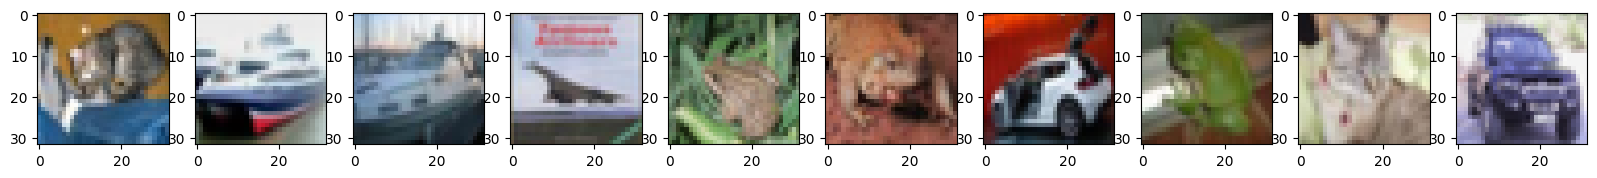

In [ ]:
fig,axs = plt.subplots(1,10,figsize=(20,2))
for i in range(10):
  data,label = test_set[i]
  axs[i].imshow(data.permute((1,2,0)))

In [ ]:
train_loader = DataLoader(
    dataset=train_set,
    batch_size = args['batch_size'],
    shuffle=True
)

In [ ]:
test_loader = DataLoader(
    dataset=test_set,
    batch_size = args['batch_size'],
    shuffle=True
)

## LeNet 5

First of all, we need to **implement a CNN**. Yes, it's time to put into practice everything we know about convolutional networks, building a complete architecture!

The chosen architecture for this class is LeNet. It is the first successful CNN in history, [proposed in 1998 by Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf).

<img src="https://drive.google.com/uc?export=view&id=1BThCsFE8fSCe012klZmp8UpslOlzWsmK" width="800">

<img src="https://drive.google.com/uc?export=view&id=1oG_Jh8nA2Nrq8RTcIyJEOaIXXxa10Srw" width="700">

Let's implement convolutional blocks including all the layers we have learned in this course:
```python
net = nn.Sequential(
          nn.Conv2d(...),
          nn.BatchNorm2d(...),
          nn.Tanh(), # LeNet-specific activation
          nn.AvgPool2d(...), # LeNet-specific pooling
      )


In [ ]:
# Setting Network
net = nn.Sequential(
    ## ConvBlock 1
    nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=0),
    nn.BatchNorm2d(6),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2, stride=2, padding=0),

    ## ConvBlock 2
    nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
    nn.BatchNorm2d(16),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2,stride=2,padding=0),

    ## ConvBlock 3
    nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0),
    nn.BatchNorm2d(120),
    nn.Tanh(),
    nn.Flatten(),

    ## DenseBlock
    nn.Linear(120, 84),
    nn.Tanh(),
    nn.Linear(84, 10),

)

In [ ]:
net = net.to('cuda')

VGG16

In [ ]:
# # Definindo a rede
# net = nn.Sequential(
#         ## ConvBlock 1
#         nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),      # entrada: (b, 3, 224, 224) e saida: (b, 64, 224, 224)
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2, stride=2, padding=0),          # entrada: (b, 64, 224, 224) e saida: (b, 64, 112, 112)

#         ## ConvBlock 2
#         nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),    # entrada: (b, 64, 112, 112) e saida: (b, 128, 112, 112)
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2, stride=2, padding=0),          # entrada: (b, 128, 112, 112) e saida: (b, 128, 56, 56)

#         ## ConvBlock 3
#         nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),   # entrada: (b, 128, 56, 56) e saida: (b, 256, 56, 56)
#         nn.ReLU(),
#         nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),   # entrada: (b, 256, 56, 56) e saida: (b, 256, 56, 56)
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2, stride=2, padding=0),          # entrada: (b, 256, 56, 56) e saida: (b, 256, 28, 28)

#         ## ConvBlock 4
#         nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),   # entrada: (b, 256, 28, 28) e saida: (b, 512, 28, 28)
#         nn.ReLU(),
#         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),   # entrada: (b, 512, 28, 28) e saida: (b, 512, 28, 28)
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2, stride=2, padding=0),          # entrada: (b, 512, 28, 28) e saida: (b, 512, 14, 14)

#         ## ConvBlock 4
#         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),   # entrada: (b, 512, 14, 14) e saida: (b, 512, 14, 14)
#         nn.ReLU(),
#         nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),   # entrada: (b, 512, 14, 14) e saida: (b, 512, 14, 14)
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2, stride=2, padding=0),          # entrada: (b, 512, 14, 14) e saida: (b, 512, 7, 7)
#         nn.Flatten(),  # lineariza formando um vetor               # entrada: (b, 512, 7, 7) e saida: (b, 512*7*7) = (b, 25088)

#         ## DenseBlock
#         nn.Linear(25088, 4096),                                    # entrada: (b, 25088) e saida: (b, 4096)
#         nn.ReLU(),
#         nn.Linear(4096, 4096),                                     # entrada: (b, 4096) e saida: (b, 4096)
#         nn.ReLU(),
#         nn.Linear(4096, 10),                                       # entrada: (b, 4096) e saida: (b, 10)
#         nn.Softmax(dim=-1)
#         )

# # Subindo no hardware de GPU (se disponível)
# net = net.to(args['device'])

# Train Strategies

## From Scratch

The first step in training from scratch is to define the algorithms that will be used in the training process. They are:

* **Loss function**, which will evaluate the quality of the network's performance at each training step;
* **Optimizer**, which, based on the loss function, will determine the best way to update the weights.



In [ ]:
criterion = nn.CrossEntropyLoss().to('cuda') # LOSS
optimizer = optim.Adam(net.parameters(),lr=args['lr'],weight_decay=args['weight_deccay']) # Optimizer

Recalling the step-by-step training flow:

* Iterate over epochs
* Iterate over batches
* Cast data to the hardware device
* Forward pass in the network and calculate loss
* Zero the optimizer gradient
* Calculate gradient and update weights

To monitor the convergence of your model (and ensure everything was done correctly), at the end of each epoch, we can print the mean and standard deviation of the losses for each iteration.


In [ ]:
def train(train_loader,net,epoch):

  # training mode
  net.train()

  start = time.time()

  epoch_loss = []
  pred_list,rotulo_list = [], []

  for batch in train_loader:

    dado,rotulo = batch

    # gpu cast
    dado = dado.to('cuda')
    rotulo = rotulo.to('cuda')

    # Forward
    ypred= net(dado)
    loss = criterion(ypred,rotulo)
    epoch_loss.append(loss.cpu().data)

    _, pred = torch.max(ypred, axis=1)
    pred_list.append(pred.cpu().numpy())
    rotulo_list.append(rotulo.cpu().numpy())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)

  end = time.time()
  print('#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))

  return epoch_loss.mean()

## Validation

For this step, PyTorch provides two tools:
* ```model.eval()```: Affects the *forward* pass of the network, informing the layers in case their behavior changes between flows (e.g., dropout).
* ```with torch.no_grad()```: Context manager that disables the calculation and storage of gradients (saves time and memory). All validation code should be executed within this context.

Example code for validation:
```python
net.eval()
with torch.no_grad():
  for batch in test_loader:
      # Validation code
```
There is the equivalent of ```model.eval()``` to explicitly state that your network should be in training mode, which is ```model.train()```. Although it is the default for models, it is good practice to also set the training mode explicitly.


In [ ]:
def validate(test_loader,net,epoch):
  #Evaluating mode
  net.eval()

  start = time.time()

  epoch_loss  = []
  pred_list, rotulo_list = [], []

  with torch.no_grad():
    for batch in test_loader:
      dado, rotulo = batch

      # gpu cast
      dado = dado.to('cuda')
      rotulo = rotulo.to('cuda')

      # Forward
      ypred = net(dado)
      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

      _, pred = torch.max(ypred, axis=1)
      pred_list.append(pred.cpu().numpy())
      rotulo_list.append(rotulo.cpu().numpy())

  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)

  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))

  return epoch_loss.mean()


In [ ]:
train_losses, test_losses = [], []
for epoch in range(args['epoch_num']):

  # Train
  train_losses.append(train(train_loader, net, epoch))

  # Validate
  test_losses.append(validate(test_loader, net, epoch))

#################### Train ####################
Epoch 0, Loss: 0.1332 +/- 0.0619, Acc: 95.72, Time: 2.12
********** Validate **********
Epoch 0, Loss: 0.1036 +/- 0.0454, Acc: 96.69, Time: 1.70

#################### Train ####################
Epoch 1, Loss: 0.1432 +/- 0.0679, Acc: 95.37, Time: 2.14
********** Validate **********
Epoch 1, Loss: 0.0823 +/- 0.0398, Acc: 97.92, Time: 2.05

#################### Train ####################
Epoch 2, Loss: 0.1387 +/- 0.0657, Acc: 95.23, Time: 2.59
********** Validate **********
Epoch 2, Loss: 0.1621 +/- 0.0755, Acc: 94.68, Time: 1.70

#################### Train ####################
Epoch 3, Loss: 0.1369 +/- 0.0651, Acc: 95.45, Time: 2.41
********** Validate **********
Epoch 3, Loss: 0.0672 +/- 0.0358, Acc: 98.42, Time: 3.56

#################### Train ####################
Epoch 4, Loss: 0.1192 +/- 0.0585, Acc: 95.95, Time: 2.96
********** Validate **********
Epoch 4, Loss: 0.0814 +/- 0.0394, Acc: 97.77, Time: 2.07

#################### Train ###

# Train Strategies


In this script, we will explore the main training and utilization strategies of convolutional neural networks:

* Training from scratch
* Feature extraction
* Fine-Tuning

But before we proceed, let's do the imports.

In [ ]:
# Implementação e treinamento da rede
import torch
from torch import nn, optim

# Carregamento de Dados e Modelos
from torch.utils.data import DataLoader
from torchvision import datasets, models
from torchvision import transforms

# Plots e análises
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time, os

%matplotlib inline

# Configurando hiperparâmetros.
args = {
    'epoch_num': 5,      # Número de épocas.
    'lr': 1e-3,           # Taxa de aprendizado.
    'weight_decay': 8e-4, # Penalidade L2 (Regularização).
    'batch_size': 20,     # Tamanho do batch.
}

# Definindo dispositivo de hardware
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

cuda


### Feature Extraction

This strategy is based on the use of **pre-trained models** on large-scale datasets. Networks trained on a significant and diverse amount of data can extract high-quality features from data they have never seen before.

As illustrated in the image, the extraction is performed as follows:
* **Adapt the network**: The classification layer is removed from the pre-trained network.
* **Extract the features**: Forward the data through the network. The last layer now does not perform classification; it only produces high-level semantic features.
* **Train a common classifier**: Feed the extracted features from the training and test data to a classifier (such as SVM).

![Feature Extraction](https://drive.google.com/uc?export=view&id=1Pulm0YqT53yB34eCkQSbCbzHuBPtAhU9)


In [ ]:
data_transform = transforms.Compose([
                                     transforms.Resize(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])
                  ])

train_set = datasets.CIFAR10('.',
                      train=True,
                      transform= data_transform, # transformação composta
                      download=True)

test_set = datasets.CIFAR10('.',
                      train=False,
                      transform= data_transform, # transformação composta
                      download=False)

Files already downloaded and verified


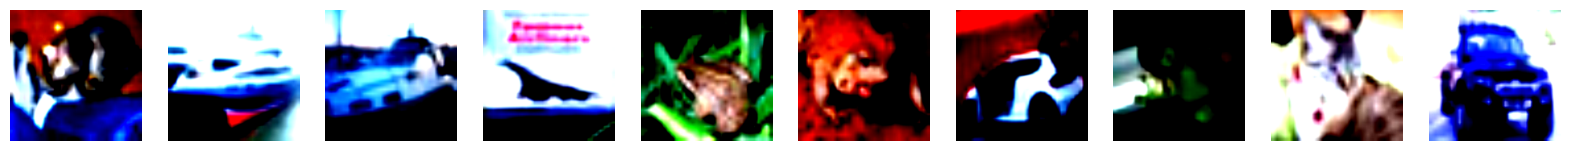

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(20, 2))
for i in range(10):
  data, label = test_set[i]
  axs[i].imshow(data.permute((1,2,0)))
  axs[i].axis('off')

### Carregando Dados



In this script, we will use a model pre-trained on **[ImageNet](http://www.image-net.org/)**, a dataset with 1,000 object classes. To this day, models pre-trained on this dataset produce features that serve as a foundation for numerous applications.

Data loading should follow **the same preprocessing** as the training of the model used. <br>
Preprocessing based on ImageNet: https://github.com/pytorch/examples/blob/master/imagenet/main.py#L202

We will use a **[composition of transformations](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose)** in PyTorch to perform multiple transformations on the data.

```python
transforms.Compose([
     # List of transformations.
])

```

In [ ]:
train_loader = DataLoader(train_set,
                          batch_size=args['batch_size'],
                          shuffle=True)

test_loader = DataLoader(test_set,
                          batch_size=args['batch_size'],
                          shuffle=True)

### Adapting the Network

Let's choose a model from PyTorch's library of pre-trained models:<br>
https://pytorch.org/docs/stable/torchvision/models.html

Unfortunately, PyTorch does not include a pre-trained model of the LeNet we implemented earlier. So, we will use one of the modern CNN models.


In [ ]:
net = models.vgg16_bn(pretrained=True).to(args['device'])
print(net)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:07<00:00, 72.3MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

Through the function ```net.children()```, we can individually access the modules implemented in the network.

https://pytorch.org/docs/stable/nn.html#torch.nn.Module.children


In [ ]:
print(list(net.named_children())[-1])

('classifier', Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
))


We can redefine the network with all the original modules **except the last one**, responsible for classifying the features learned by the previous layers.


In [ ]:
net.classifier = nn.Sequential(list(net.children())[-1][:-3]).to(args['device'])
print(net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

### Extracting

In this step, we follow the same flow as the validation function we implemented earlier. This time, we don't need to calculate the final prediction, just store the network outputs.


In [ ]:
def extrai_caracteristicas(net, loader):

  # Evaluation mode
  net.eval()

  feat_list, rotulo_list = [], []
  with torch.no_grad():
    for k, batch in enumerate(loader):
      print('\r--{0}/{1}--'.format(k, len(loader)), end='', flush=True)

      dado, rotulo = batch

      # Cast do dado na GPU
      dado = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Extração
      caracteristica = net(dado)
      feat_list.append(caracteristica.detach().cpu().numpy())
      rotulo_list.append(rotulo.detach().cpu().numpy())

  feat_list    = np.asarray(feat_list)
  feat_list    = np.reshape(feat_list, (feat_list.shape[0]*feat_list.shape[1], feat_list.shape[2]))

  rotulo_list  = np.asarray(rotulo_list).ravel()

  return feat_list, rotulo_list


In [ ]:
print('Load train')
train_X, train_Y = extrai_caracteristicas(net, train_loader)
print('\nLoad test')
test_X,  test_Y  = extrai_caracteristicas(net, test_loader)

Load train
--2499/2500--
Load test
--499/500--

### Training a Classification Model (SVM)
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

Classification models in the ```scikit-learn``` package follow the following usage pattern:
```python
# Classifier definition
clf = LinearSVC()
# Training
clf.fit(X, y)
# Using on the test set
pred = clf.predict(Xt)


In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(train_X, train_Y)

pred = clf.predict(test_X)
print('{:.2f}%'.format(accuracy_score(test_Y, pred)*100))

86.18%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---

## Fine-Tuning

The goal here is to leverage the value of a well-trained model and its ability to generalize to unseen data.

Remember that learning is hierarchical, meaning that initial layers (in red in the image) learn low-level features (edges, corners, etc.) that can be beneficial for multiple datasets. **We then adapt more semantic layers** (in yellow in the image), which learn more dataset-specific features.

Here we will follow two steps:
* Replace the classification layer of the original network;
* "Freeze" initial layers of the network to preserve their weights;
* Define multiple learning rates to train the final layers.

<img src="https://drive.google.com/uc?export=view&id=1BHzTprOsXunB7xmKZ7amcScfh2MRSqO1" alt="drawing" width="400"/>


In [ ]:
net = models.vgg16_bn(pretrained=True).to(args['device'])
print(net)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

## Adapting the Network


In [ ]:
in_features = list(net.children())[-1][-1].in_features

new_classifier =list(net.classifier.children())[:-1]
new_classifier.append(nn.Linear(in_features, 10))

net.classifier = nn.Sequential(*new_classifier).to(args['device'])
print(net.classifier)

This time, let's redefine the classification layer, creating a new layer with dimensions suitable for our task.

* The original model classified the 1,000 classes of ImageNet <br>
```nn.Linear(in_features, 1000)```
* Our adaptation will classify 10 classes from CIFAR10 <br>
```nn.Linear(in_features, 10)```


## Defining Multiple Learning Rates

To "freeze" the initial layers, we just need to change the ```requires_grad``` attribute, setting it to ```False``` for parameters we don't want to train. We can iterate over the network parameters using the function ```net.named_parameters()```.

To define multiple learning rates in the optimizer, we can refer to the documentation of the ```optim``` package:<br>
https://pytorch.org/docs/stable/optim.html

We can define a list of dictionaries for each module we want to train.
```python
optim.Adam([
            {'params': model.base.parameters()},
            {'params': model.classifier.parameters(), 'lr': 1e-3}
          ], lr=0)


In [ ]:
optimizer = optim.Adam([
            {'params': net.features.parameters(), 'lr':args['lr']*0.2, 'weight_decay': args['weight_decay']*0.2},
            {'params': net.classifier.parameters(), 'lr': args['lr'], 'weight_decay': args['weight_decay']}
        ], lr=0)

In [ ]:
criterion = nn.CrossEntropyLoss().to(args['device'])

## Training and Validation

Here we will use the same flow as we implemented earlier. We have already modified the network and optimizer to indicate that we will perform fine-tuning instead of training from scratch.


In [ ]:
def train(train_loader, net, epoch):

  # Training mode
  net.train()

  start = time.time()

  epoch_loss  = []
  pred_list, rotulo_list = [], []
  for k, batch in enumerate(train_loader):
    print('\r--{0}/{1}--'.format(k, len(train_loader)), end='', flush=True)
    dado, rotulo = batch

    # Cast do dado na GPU
    dado = dado.to(args['device'])
    rotulo = rotulo.to(args['device'])

    # Forward
    ypred = net(dado)
    # print(ypred.size(), rotulo.size())
    loss = criterion(ypred, rotulo)
    # print(loss.size())
    epoch_loss.append(loss.cpu().data)

    _, pred = torch.max(ypred, axis=1)
    pred_list.append(pred.cpu().numpy())
    rotulo_list.append(rotulo.cpu().numpy())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)

  end = time.time()
  print('\n#################### Train ####################')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))

  return epoch_loss.mean()


In [ ]:
def validate(test_loader, net, epoch):

  # Evaluation mode
  net.eval()

  start = time.time()

  epoch_loss  = []
  pred_list, rotulo_list = [], []
  with torch.no_grad():
    for k, batch in enumerate(test_loader):

      print('\r--{0}/{1}--'.format(k, len(test_loader)), end='', flush=True)
      dado, rotulo = batch

      # Cast do dado na GPU
      dado = dado.to(args['device'])
      rotulo = rotulo.to(args['device'])

      # Forward
      ypred = net(dado)
      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

      _, pred = torch.max(ypred, axis=1)
      pred_list.append(pred.cpu().numpy())
      rotulo_list.append(rotulo.cpu().numpy())

  epoch_loss = np.asarray(epoch_loss)
  pred_list  = np.asarray(pred_list).ravel()
  rotulo_list  = np.asarray(rotulo_list).ravel()

  acc = accuracy_score(pred_list, rotulo_list)

  end = time.time()
  print('\n********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Acc: %.2f, Time: %.2f\n' % (epoch, epoch_loss.mean(), epoch_loss.std(), acc*100, end-start))

  return epoch_loss.mean()


In [ ]:
train_losses, test_losses = [], []
for epoch in range(args['epoch_num']):

  # Train
  train_losses.append(train(train_loader, net, epoch))

  # Validate
  test_losses.append(validate(test_loader, net, epoch))

--2499/2500--
#################### Train ####################
Epoch 0, Loss: 0.7792 +/- 0.5190, Acc: 75.73, Time: 1064.15
--499/500--
********** Validate **********
Epoch 0, Loss: 0.5216 +/- 0.2240, Acc: 83.65, Time: 83.37

--2499/2500--
#################### Train ####################
Epoch 1, Loss: 0.4787 +/- 0.2477, Acc: 85.18, Time: 1063.27
--499/500--
********** Validate **********
Epoch 1, Loss: 0.4291 +/- 0.2324, Acc: 86.46, Time: 83.61

--2499/2500--
#################### Train ####################
Epoch 2, Loss: 0.4388 +/- 0.2642, Acc: 86.77, Time: 1062.15
--499/500--
********** Validate **********
Epoch 2, Loss: 0.6064 +/- 0.4721, Acc: 84.92, Time: 83.70

--2499/2500--
#################### Train ####################
Epoch 3, Loss: 0.3521 +/- 0.2327, Acc: 89.40, Time: 1062.48
--499/500--
********** Validate **********
Epoch 3, Loss: 0.3507 +/- 0.2306, Acc: 89.46, Time: 83.20

--2499/2500--
#################### Train ####################
Epoch 4, Loss: 0.3125 +/- 0.2242, Acc: 90.